# Kaggle Titanic Challenge

In [230]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [231]:
# load the data, have a basic overview of the dataset
train_orig = pd.read_csv('train.csv')
test_orig = pd.read_csv('test.csv')
data_orig = [train_orig, test_orig]
train_orig.info()
train_orig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
# Check if there is any null value in the dataframe
print('# of null value in training set:\n', train_orig.isnull().sum())
print('# of null value in testing set:\n', test_orig.isnull().sum())

# of null value in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
# of null value in testing set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [233]:
train_orig.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jalsevac, Mr. Ivan",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [234]:
# remove the colums that are unrelated to the classification ['PassengerId', 'Ticket', 'Fare', 'Embarked']
# also remove colunm 'Cabin' since there are too many null values
for dataset in data_orig:
    dataset.drop(['PassengerId', 'Ticket', 'Fare', 'Embarked', 'Name', 'Cabin'], axis = 1, inplace = True)

In [235]:
# fill the null value for column 'age' using median
for dataset in data_orig:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

In [236]:
# check the dataset after clearning
train = data_orig[0]
test = data_orig[1]
train.info()
train.head()
print('-'*10)
print('# of null value in training set:\n', train.isnull().sum())
print('# of null value in testing set:\n', test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB
----------
# of null value in training set:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64
# of null value in testing set:
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64


In [237]:
train.head()
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [238]:
# create some new features
for dataset in data_orig:
    dataset['AgeBin'] = pd.qcut(dataset['Age'], 4)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

In [239]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeBin,FamilySize,IsAlone
0,0,3,male,22.0,1,0,"(0.419, 22.0]",2,0
1,1,1,female,38.0,1,0,"(35.0, 80.0]",2,0
2,1,3,female,26.0,0,0,"(22.0, 28.0]",1,1
3,1,1,female,35.0,1,0,"(28.0, 35.0]",2,0
4,0,3,male,35.0,0,0,"(28.0, 35.0]",1,1


In [240]:
# convert object type to category
label = LabelEncoder()
for dataset in data_orig:
    dataset['SexCode'] = label.fit_transform(dataset['Sex'])

In [241]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeBin,FamilySize,IsAlone,SexCode
0,0,3,male,22.0,1,0,"(0.419, 22.0]",2,0,1
1,1,1,female,38.0,1,0,"(35.0, 80.0]",2,0,0
2,1,3,female,26.0,0,0,"(22.0, 28.0]",1,1,0
3,1,1,female,35.0,1,0,"(28.0, 35.0]",2,0,0
4,0,3,male,35.0,0,0,"(28.0, 35.0]",1,1,1


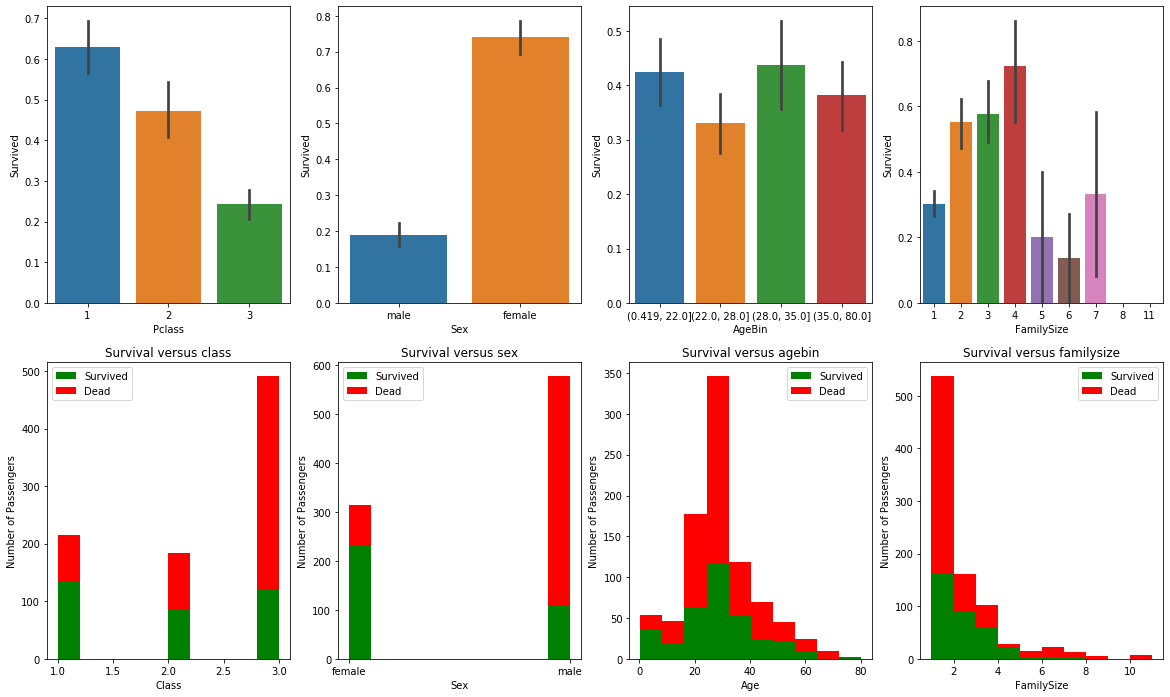

In [242]:
# some graphical analysis
fig, ax1 = plt.subplots(2,4, figsize = (20,12))
sns.barplot(x = 'Pclass', y = 'Survived', data=train, ax = ax1[0,0])
sns.barplot(x = 'Sex', y = 'Survived', data=train, ax = ax1[0,1])
sns.barplot(x = 'AgeBin', y = 'Survived', data=train, ax = ax1[0,2])
sns.barplot(x = 'FamilySize', y = 'Survived', data=train, ax = ax1[0,3])

ax1[1,0].hist(x = [train[train['Survived']==1]['Pclass'], train[train['Survived']==0]['Pclass']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
ax1[1,0].set_title('Survival versus class')
ax1[1,0].set_xlabel('Class')
ax1[1,0].set_ylabel('Number of Passengers')
ax1[1,0].legend()

ax1[1,1].hist(x = [train[train['Survived']==1]['Sex'], train[train['Survived']==0]['Sex']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
ax1[1,1].set_title('Survival versus sex')
ax1[1,1].set_xlabel('Sex')
ax1[1,1].set_ylabel('Number of Passengers')
ax1[1,1].legend()

ax1[1,2].hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
ax1[1,2].set_title('Survival versus agebin')
ax1[1,2].set_xlabel('Age')
ax1[1,2].set_ylabel('Number of Passengers')
ax1[1,2].legend()

ax1[1,3].hist(x = [train[train['Survived']==1]['FamilySize'], train[train['Survived']==0]['FamilySize']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
ax1[1,3].set_title('Survival versus familysize')
ax1[1,3].set_xlabel('FamilySize')
ax1[1,3].set_ylabel('Number of Passengers')
ax1[1,3].legend()

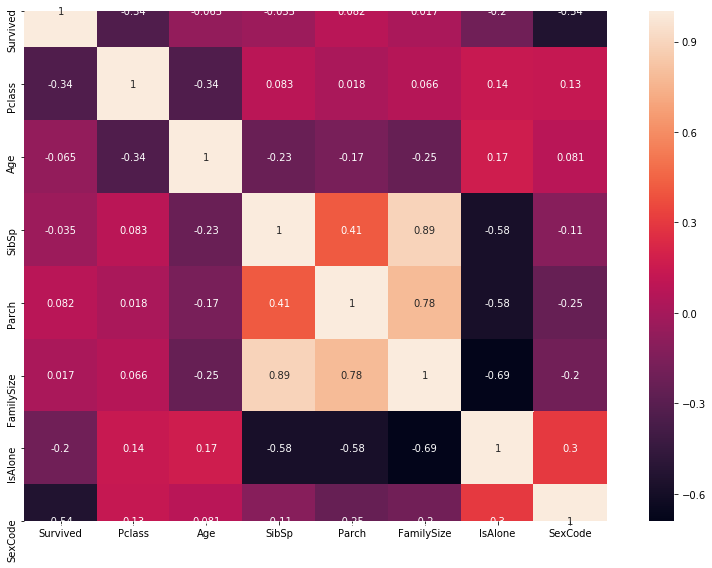

In [243]:
# correlation heatmap
plt.figure(figsize=[12,8])
ch_plot = sns.heatmap(train.corr(), annot=True, square=True)
plt.tight_layout()

In [244]:
# change the interval type to class type
train.head()
test.head()
for dataset in data_orig:
    dataset.loc[ dataset['Age'] <= 23.0, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 23.0) & (dataset['Age'] <= 27.0), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 27.0) & (dataset['Age'] <= 35.75), 'Age']   = 2
    dataset.loc[ dataset['Age'] > 35.75, 'Age'] = 3
    dataset['Age'] = dataset['Age'].astype(int)

In [245]:
# now split the training data into training and validation by 8:2 using model_selection.train_test_split
train.head()
x_train1 = train.iloc[:,1:10]
x_test = test
y_train1 = train.iloc[:,0]
x_train1.drop(['Sex', 'Age', 'AgeBin'], axis = 1, inplace = True)
x_test.drop(['Sex', 'Age', 'AgeBin'], axis = 1, inplace = True)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.2, random_state = 0)

In [246]:
# check the shape of training and validation and test data
print('shape of x_train: ', x_train.shape)
print('shape of y_train: ', y_train.shape)
print('shape of x_val: ', x_val.shape)
print('shape of y_val: ', y_val.shape)
print('shape of x_test: ', x_test.shape)

shape of x_train:  (712, 6)
shape of y_train:  (712,)
shape of x_val:  (179, 6)
shape of y_val:  (179,)
shape of x_test:  (418, 6)


In [250]:
# use the algorithm library from sklearn to fit the data and evaluate the model and compare
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_logreg = logreg.score(x_train, y_train)
pred_logreg = logreg.predict(x_val)
acc_pred_logreg = accuracy_score(y_val, pred_logreg)

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = svc.score(x_train, y_train)
pred_svc = svc.predict(x_val)
acc_pred_svc = accuracy_score(y_val, pred_svc)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
acc_rfc = rfc.score(x_train, y_train)
pred_rfc = rfc.predict(x_val)
acc_pred_rfc = accuracy_score(y_val, pred_rfc)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
acc_knn = knn.score(x_train, y_train)
pred_knn = knn.predict(x_val)
acc_pred_knn = accuracy_score(y_val, pred_knn)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
acc_gnb = gnb.score(x_train, y_train)
pred_gnb = gnb.predict(x_val)
acc_pred_gnb = accuracy_score(y_val, pred_gnb)

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
acc_bnb = bnb.score(x_train, y_train)
pred_bnb = bnb.predict(x_val)
acc_pred_bnb = accuracy_score(y_val, pred_bnb)

pct = Perceptron()
pct.fit(x_train, y_train)
acc_pct = pct.score(x_train, y_train)
pred_pct = pct.predict(x_val)
acc_pred_pct = accuracy_score(y_val, pred_pct)

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
acc_sgd = sgd.score(x_train, y_train)
pred_sgd = sgd.predict(x_val)
acc_pred_sgd = accuracy_score(y_val, pred_sgd)

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
acc_dtc = dtc.score(x_train, y_train)
pred_dtc = dtc.predict(x_val)
acc_pred_dtc = accuracy_score(y_val, pred_dtc)

/Users/liuxingyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liuxingyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/liuxingyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [254]:
# create the accuracy dictionary
acc_dict = {'Model': ['Logistic Regression', 'SVM', 'RandomForrest', 'KNN', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Percptron', 'SGD', 'DecisionTree'],
           'Training Score': [acc_logreg, acc_svc, acc_rfc, acc_knn, acc_gnb, acc_bnb, acc_pct, acc_sgd, acc_dtc], 
           'Validation Score': [acc_pred_logreg, acc_pred_svc, acc_pred_rfc, acc_pred_knn, acc_pred_gnb, acc_pred_bnb, acc_pred_pct, acc_pred_sgd, acc_pred_dtc]}

In [257]:
# create the accuracy table 
acc_table = pd.DataFrame(acc_dict)
acc_table

,Model,Training Score,Validation Score
0,Logistic Regression,0.800562,0.798883
1,SVM,0.808989,0.804469
2,RandomForrest,0.816011,0.815642
3,KNN,0.772472,0.765363
4,Gaussian Naive Bayes,0.794944,0.804469
5,Bernoulli Naive Bayes,0.786517,0.787709
6,Percptron,0.705056,0.726257
7,SGD,0.601124,0.636872
8,DecisionTree,0.816011,0.798883


In [261]:
# as we can see that the performance of RandomForrest is the best. so we will use this algorithm on testing data
y_pred_test = rfc.predict(x_test)

In [267]:
my_submission = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'], 'Survived': y_pred_test})

In [269]:
my_submission.to_csv('my_submission.csv', index = False)